# Peculiaridades y problemas en la regresión lineal

## Variables categóricas
Al ser valores discretos (por ejemplo, pertenece a la ciudad 1, 2 o 3) no podemos convertir una variable categórica en un número.<br>
Debemos crear variables dummy que tomarán el valor 0 o 1 dependiendo de si pertenece a esa ciudad, en este ejemplo.<br>
Hacen falta k - 1 variables dummy siendo k el número de categorías ya que si no pertenece a ninguna de las k - 1, pertenece a la restante.

In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("/Users/pabloarranzropero/workspace-python/curso-ml-udemy/datasets/ecom-expense/Ecom Expense.csv")
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [70]:
dummy_gender = pd.get_dummies(data["Gender"], prefix="Gender")

dummy_city_tier = pd.get_dummies(data["City Tier"], prefix="City")

#Añadimos las dummy al dataset original
data = data.join([dummy_gender, dummy_city_tier])
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [81]:
#Ahora podemos escoger las columnas que queramos para crear nuestro modelo:
#feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3"]

#Como son variables categóricas excluyentes no hace falta añadir todas las categorías sino k - 1 (da exactamente el mismo resultado a excepción de los coeficientes)
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 1", "City_Tier 2"]
X = data[feature_cols]
y = data["Total Spend"]

In [82]:
model = LinearRegression()
model = model.fit(X, y)

In [83]:
print(u"\u03B1:", model.intercept_)
print(u"\u03B2:")
list(zip(feature_cols, model.coef_))

α: 3458.58737526
β:


[('Monthly Income', 0.15297824609320484),
 ('Transaction Time', 0.12372608642600284),
 ('Gender_Male', 188.31559766064046),
 ('City_Tier 1', 222.64748519981197),
 ('City_Tier 2', 86.305215587920415)]

In [84]:
model.score(X, y)

0.19478920552885381

Sale una mierda así que probamos añadiendo otras variables

In [86]:
#Ahora podemos escoger las columnas que queramos para crear nuestro modelo:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 1", "City_Tier 2", "Record"]
X = data[feature_cols]
y = data["Total Spend"]

model = LinearRegression()
model = model.fit(X, y)

model.score(X, y)

0.91799235861310158

La variable record aumenta muchisimo el $R^2$ del modelo.<br>
También podríamos hacer el análisis del notebook anterior para ver qué variables son importantes etc... antes de aplicar la regresión lineal a ciegas.

In [88]:
SSD = sum((model.predict(X) - y)**2)
RSE = np.sqrt(SSD/(X.shape[0] - len(feature_cols) - 1))

error = RSE / y.mean()
print("Error del modelo:", error)

Error del modelo: 0.13025601114


## Eliminar variables dummy redundantes
En vez de crear todas las dummy y luego solo seleccionar k-1, creamos solo k-1

In [69]:
data = pd.read_csv("/Users/pabloarranzropero/workspace-python/curso-ml-udemy/datasets/ecom-expense/Ecom Expense.csv")

dummy_gender = pd.get_dummies(data["Gender"], prefix="Gender").iloc[:,1:] #No coge la columna 0
dummy_city_tier = pd.get_dummies(data["City Tier"], prefix="City").iloc[:,1:]

#Añadimos las dummy al dataset original
data = data.join([dummy_gender, dummy_city_tier])
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


## Relacion no lineal
Hacemos scatter plots para comprobar si hay relaciones no lineales entre la variable de salida y alguna de entrada

In [70]:
data = pd.read_csv("/Users/pabloarranzropero/workspace-python/curso-ml-udemy/datasets/auto/auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [71]:
#Comprobamos si hay NAs
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


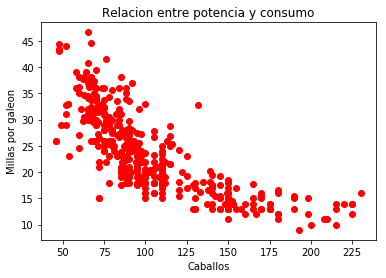

In [77]:
# Comprobamos si hay una relación no lineal entre horsepower y mpg
plt.scatter(data["horsepower"], data["mpg"], color="r")
plt.xlabel("Caballos")
plt.ylabel("Millas por galeon")
plt.title("Relacion entre potencia y consumo")

Como vemos no se ajusta a una relación lineal sino más bien cuadrática o exponencial...<br>
Primero hacemos una relación lineal y luego no lineal para ver como cambia.

#### Regresión lineal

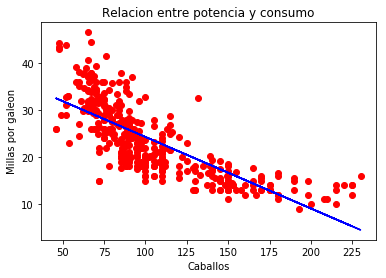

In [91]:
#Rellenamos los NAs con la media de su columna
#Hay que convertir la X a formato DataFrame porque cogiendo la columna es un vector de 1 sola dimensión
X = pd.DataFrame(data["horsepower"].fillna(data["horsepower"].mean()))
y = data["mpg"].fillna(data["mpg"].mean())

model = LinearRegression()
#Para convertir a 2D también podría poner en el fit X[:,np.newaxis]
model.fit(X,y)

plt.scatter(data["horsepower"], data["mpg"], color="r")
plt.xlabel("Caballos")
plt.ylabel("Millas por galeon")
plt.title("Relacion entre potencia y consumo")
plt.plot(X, model.predict(X), color="b")

In [100]:
model.score(X,y)

0.57465334064502505

In [101]:
SSD = sum((y - model.predict(X))**2)
RSE = np.sqrt(SSD / X.shape[0] - 1)
error = RSE / y.mean()
error

0.21010252948625174

No parece un modelo demasiado bueno ya que como hemos dicho antes no sigue una relación lineal.<br>
Probamos con un modelo cuadrático.

In [134]:
X_sqr = X**2

model = LinearRegression()
model.fit(X_sqr,y)

model.score(X_sqr, y)

0.48498870348232048

In [118]:
SSD = sum((y - model.predict(X_sqr))**2)
RSE = np.sqrt(SSD / X_sqr.shape[0] - 1)
error = RSE / y.mean()
error

0.23201258489519014

Es peor, baja $R^2$ y sube el error.<br>
Probamos el simple + el cuadrático. Para esto necesitamos usar linear_model en vez de LinearRegression

In [142]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly,y)

model.score(X_poly, y)

0.6439066584257469

In [143]:
SSD = sum((y - model.predict(X_poly))**2)
RSE = np.sqrt(SSD / X_poly.shape[0] - 1)
error = RSE / y.mean()
error

0.19147169094968505

Es mejor, sube $R^2$ y baja el error.<br>

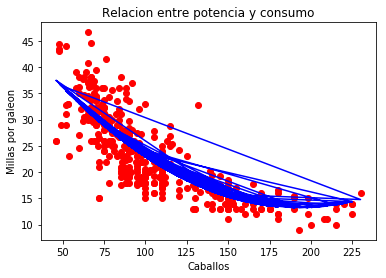

In [146]:
plt.scatter(data["horsepower"], data["mpg"], color="r")
plt.xlabel("Caballos")
plt.ylabel("Millas por galeon")
plt.title("Relacion entre potencia y consumo")
plt.plot(X, model.predict(X_poly), color="b")